    Focus on 'Portugal' and 'Vinho Verde' region.

    Remove Price outliers (hint: Take prices between (Q1-1.5(IQR) and Q3+1.5(IQR)).

Cut ratings or prices into 3 levels (or n levels depending on how many quality labels you have). For each level, check the price range (min_price, max_price) and mean_price/median_price.

Lastly, try to estimate the price of wines in your original dataset and provide suggestions on the price per quality label.

You do not need a Machine Learning algorithm to complete this part of the project. Also, this part of the project is not mandatory.

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

In [52]:
wine_price = pd.read_csv('wine_sales_data.csv')
wine_price.info()
wine_price.describe()

,Unnamed: 0,points,price
count,150930.000000,150930.000000,137235.000000
mean,75464.500000,87.888418,33.131482
std,43569.882402,3.222392,36.322536
min,0.000000,80.000000,4.000000
25%,37732.250000,86.000000,16.000000
50%,75464.500000,88.000000,24.000000
75%,113196.750000,90.000000,40.000000
max,150929.000000,100.000000,2300.000000


## Portugal - Vinho Verde

In [ ]:
wine_price['province'].unique()

vinho_verde=wine_price['province']=='Vinho Verde'
wine_vv=wine_price[vinho_verde]
wine_vv.info()

In [54]:
wine_vv.head()

,country,description,points,price,province,variety,winery
277,Portugal,"Pure Alvarinho from the Monção region, it's ri...",92,35.0,Vinho Verde,Alvarinho,Provam
993,Portugal,"With its typical prickle on the tongue, this i...",85,10.0,Vinho Verde,Portuguese White,Caves Campelo
994,Portugal,"Lightly spritzy, this tastes of crisp apple an...",85,9.0,Vinho Verde,Portuguese White,Caves Campelo
1378,Portugal,Some wood aging has rounded out this fruity wi...,91,NaN,Vinho Verde,Loureiro,Casal Paço Padreiro
1558,Portugal,This medium-sweet rosé is a familiar style of ...,84,10.0,Vinho Verde,Rosé,Caves Campelo


<Axes: xlabel='points', ylabel='price'>

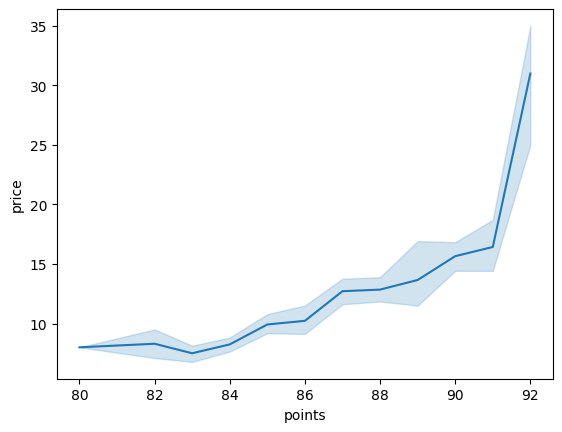

In [56]:
sns.lineplot(x='points',y='price' , data=wine_vv)

<Axes: xlabel='points', ylabel='price'>

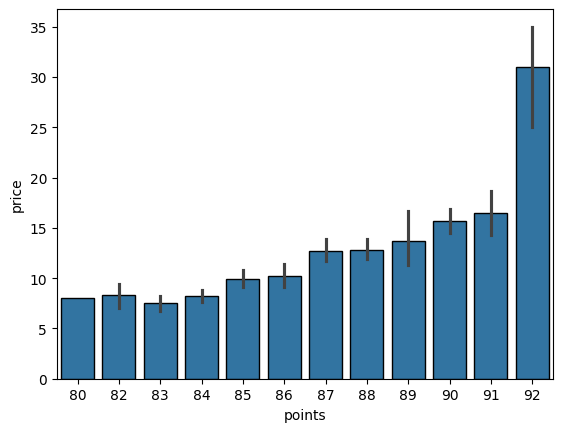

In [57]:
sns.barplot(x='points',y='price' , data=wine_vv,  edgecolor='black')

<Axes: xlabel='points', ylabel='price'>

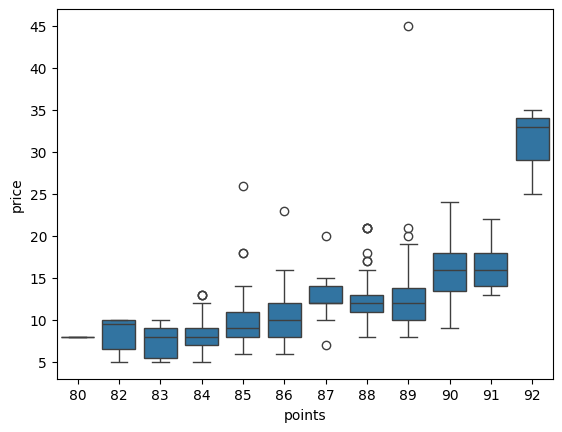

In [58]:
sns.boxplot(x='points',y='price' , data=wine_vv )